**<span style="font-family:KerkisSans; font-size:2.5em; color: red;">Data Collection and Exploration from</span>** **<span style="font-family:KerkisSans; font-size:2.5em; color: blue;">Twitter</span>**

<span style="font-family:KerkisSans; font-size:1.5em; color: black">Anna Androvitsanea</span>

<span style="font-family:KerkisSans; font-size:1.5em; color: black">anna.androvitsanea@gmail.com</span>

# Creation of a Twitter app

---
The app created is called ** streaming_twitts** .

First I install tweepy via a terminal with the command <code>pip install tweepy</code>

---

In [1]:
# Import libraries needed for this app

import tweepy
from twitter_config import config
import math
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib

In [2]:
# Here I login to the app with my credentials

auth = tweepy.OAuthHandler(config['api_key'], 
                           config['api_secret_key'])
auth.set_access_token(config['access_token'], 
                      config['access_token_secret'])

api = tweepy.API(auth)

api.get_user(screen_name='mezcla')

User(_api=<tweepy.api.API object at 0x7f8b2c798048>, _json={'id': 16936087, 'id_str': '16936087', 'name': 'mezcla', 'screen_name': 'mezcla', 'location': '', 'profile_location': None, 'description': '', 'url': None, 'entities': {'description': {'urls': []}}, 'protected': False, 'followers_count': 1, 'friends_count': 1, 'listed_count': 0, 'created_at': 'Thu Oct 23 21:31:52 +0000 2008', 'favourites_count': 0, 'utc_offset': None, 'time_zone': None, 'geo_enabled': False, 'verified': False, 'statuses_count': 3, 'lang': None, 'status': {'created_at': 'Sun Aug 21 03:08:49 +0000 2011', 'id': 105114101524594688, 'id_str': '105114101524594688', 'text': 'check this out! I made $390 today so far http://t.co/rPcZhVl', 'truncated': False, 'entities': {'hashtags': [], 'symbols': [], 'user_mentions': [], 'urls': [{'url': 'http://t.co/rPcZhVl', 'expanded_url': 'http://goo.gl/xB9RA?fobux', 'display_url': 'goo.gl/xB9RA?fobux', 'indices': [41, 60]}]}, 'source': '<a href="http://mobile.twitter.com" rel="nof

## Collection of data by building a stream
* Creation of a stream listener.
* Monitor of COVID-19 related terms. 
* Collection of 50k statuses.

In [3]:
terms = ['covid19', '#ncov2019', 'Covid_19', '#conronaviruspandemic', 'COVID-19', '#caronavirus', 
         '#infocoronavirus', 'coronavirusupdate', 'carona virus', '#coronavirues', '#Coronovirus', 
         '#2019nCoV', '#Coronvirus', '#Coronavirus', 'covid-19', 'Coronavirus', '#caronavirusoutbreak', 
         'covid', '#CoronaVirusUpdate', '#Corvid19virus', '#covid', 'coronavirus', '#CoronaVirus', 'nCoV', 
         'covid 19', '#nCoV2019', '#covid_19', '#coronavirusupdates', '#COVIDー19', '#2019nCov', '#CoronaAlert', 
         '#coronavirus', 'SARS-CoV-2', '#nCoV', '#coronanews', '#COVID', '2019nCoV', '#CoronavirusOutbreak', 
         '#coronapocolypse', '#COVID19', '#codvid19', '#codvid_19', 'coronavirus outbreak']

In [ ]:
# Create a class inheriting from StreamListener

class StreamLimitReached(Exception):
    pass

def row_of_status(s):
    import json
    # Return the requested attributes
    return [s.created_at, s.place, s.lang, s.text, s.user.screen_name, s.user.followers_count, s.user.statuses_count, s.user.location]

# Implement a listener with on_status()
class MyListener(tweepy.StreamListener):
    def __init__(self, limit, tweets):
        super(MyListener, self).__init__()
        self._max_tweets = limit
        self._number_of_tweets = 0
        self._tweets = tweets
    def on_status(self, status):
        self._tweets.append(row_of_status(status))
        self._number_of_tweets += 1
        if self._number_of_tweets >= self._max_tweets:
            raise StreamLimitReached()            
        
# Create the Stream downloading 50000 tweets

tweets = [] # list
my_listener = MyListener(50000, tweets) # apply the thresshold
my_streaming_twitts = tweepy.Stream(auth = api.auth, listener=my_listener)

   
# Start tracking terms by implementing the stream

try:
    my_streaming_twitts.filter(track=terms)
except StreamLimitReached:
    pass

# Save the streamed tweets in a dataframe

covid_tweets = pd.DataFrame(tweets, columns=['created_at','place','lang','text','screen_name', 'followers_count', 'statuses_count', 'location'])

# Save the dataframe to a csv in order to load it
# in case the notebook is turned off
covid_tweets.to_csv("covid_tweets.csv", header = True, sep = ";")

# Print head of the dataframe
covid_tweets.head(10)

## Data Management
* Store collected tweets in a dataframe.
* Keep only the following attributes: `created_at`, `place`, `lang`, `text`, `screen_name`, `followers_count`, `statuses_count`, and `location` of the `user`, Ds columns of the dataframe.

In [4]:
# Import the csv file in order to work with the data

covid_tweets = pd.read_csv("covid_tweets.csv", parse_dates = True, sep = ";")

In [5]:
# The dataframe created at step (b) is stored under the name covid_tweets
# I check the columns names

covid_tweets.columns

Index(['Unnamed: 0', 'created_at', 'place', 'lang', 'text', 'screen_name',
       'followers_count', 'statuses_count', 'location'],
      dtype='object')

In [6]:
# Index of the original dataframe is saved a columns.
# Drop the Unnamed columns

covid_tweets = covid_tweets.drop('Unnamed: 0', axis = 1)

In [7]:
# We ensure that the dates is of the type datetime

covid_tweets.created_at = pd.to_datetime(covid_tweets.created_at)

In [8]:
# We check the type

covid_tweets.dtypes

created_at         datetime64[ns]
place                      object
lang                       object
text                       object
screen_name                object
followers_count             int64
statuses_count              int64
location                   object
dtype: object

# Exploratory data analysis

In [9]:
# Report the number of unique: users

print("The number of unique users is", len(pd.unique(covid_tweets.screen_name)), ".")

The number of unique users is 38972 .


In [10]:
# Report the number of unique: locations

print("The number of unique locations is", len(pd.unique(covid_tweets.location)), ".")

The number of unique locations is 13240 .


In [11]:
# Report the number of unique: users mentioned within the tweets

# First we must extract from the text the users per tweet and 

import re

patt = r'@([A-Za-z0-9_]{1,15})'
regex = re.compile(patt)

# Then we implement the function that calculates the count of unique users mentioned. 

mentions = set()
for _, text in covid_tweets.text.iteritems():
    mentions |= set(regex.findall(text))
    
print("The number of unique users mentioned within the tweets is", len(pd.unique(mentions)), ".")

The number of unique users mentioned within the tweets is 14920 .


In [12]:
# How many tweets (%) had their place attribute empty

no_place_perc = (len(covid_tweets.place == "None")/len(covid_tweets))*100
print(no_place_perc, "% tweets had their place attribute empty")

100.0 % tweets had their place attribute empty


* Plot the distribution of languages (barplot).


In [13]:
# Create a dataframe with the languages and the number of occurences

covid_tweets_lang = covid_tweets.groupby(['lang']).size().to_frame('count').reset_index()

In [14]:
# Check type of element created

type(covid_tweets_lang)

pandas.core.frame.DataFrame

In [15]:
# View an instance of the data

covid_tweets_lang.head()

,lang,count
0,ar,46
1,bg,3
2,bn,7
3,ca,746
4,cs,68


In [16]:
# Set language as index for the dataframe

covid_tweets_lang_indexed = covid_tweets_lang.set_index('lang')
covid_tweets_lang_indexed.head(2)

,count
lang,
ar,46
bg,3


In [17]:
# Check type of data for the column count

covid_tweets_lang_indexed.columns

Index(['count'], dtype='object')

In [18]:
# Transform counts from string to integer

covid_tweets_lang_indexed["count"] = covid_tweets_lang_indexed["count"].astype(int) 

In [19]:
# Check the length of the dataframe, meaning the number of different languages

len(covid_tweets_lang_indexed)

53

Since it is not possible to represent 53 languages in on bar plot I apply a threshold.

That means that if a language is used more than 50 times, it will be considered for the analysis.


In [20]:
covid_tweets_lang_indexed_fifty = covid_tweets_lang_indexed[covid_tweets_lang_indexed["count"] > 50]

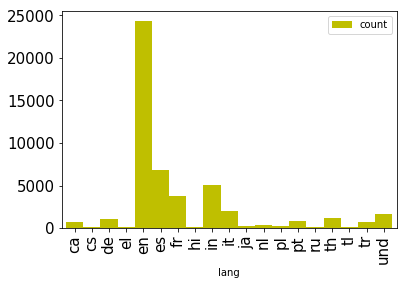

In [21]:
# Here I plot the count of the languages that appear more then 50 times

%matplotlib inline

plt.figure(figsize=(50, 25), dpi=50, 
                 facecolor='w', edgecolor='k')

plt.rc('grid', linestyle="-", color='black', alpha = 1)

covid_tweets_lang_indexed_fifty.plot(kind='bar', fontsize = 15, width=1, color = "y")

plt.show()

* I Plot the number of tweets per minute, from the minute of the first to the minute of the last tweet that was collected.

In [22]:
# Add a column called item for each tweet

covid_tweets['item'] = 1

In [23]:
# Index the dataframe according to the datetime is has been created

covid_tweets_item = covid_tweets
covid_tweets_item_indexed = covid_tweets_item.set_index('created_at')

In [24]:
# Resample the data per minute, summing up the number of tweets per minute

covid_tweets_item_indexed_per_minute = covid_tweets_item_indexed['item'].resample('1T').sum()

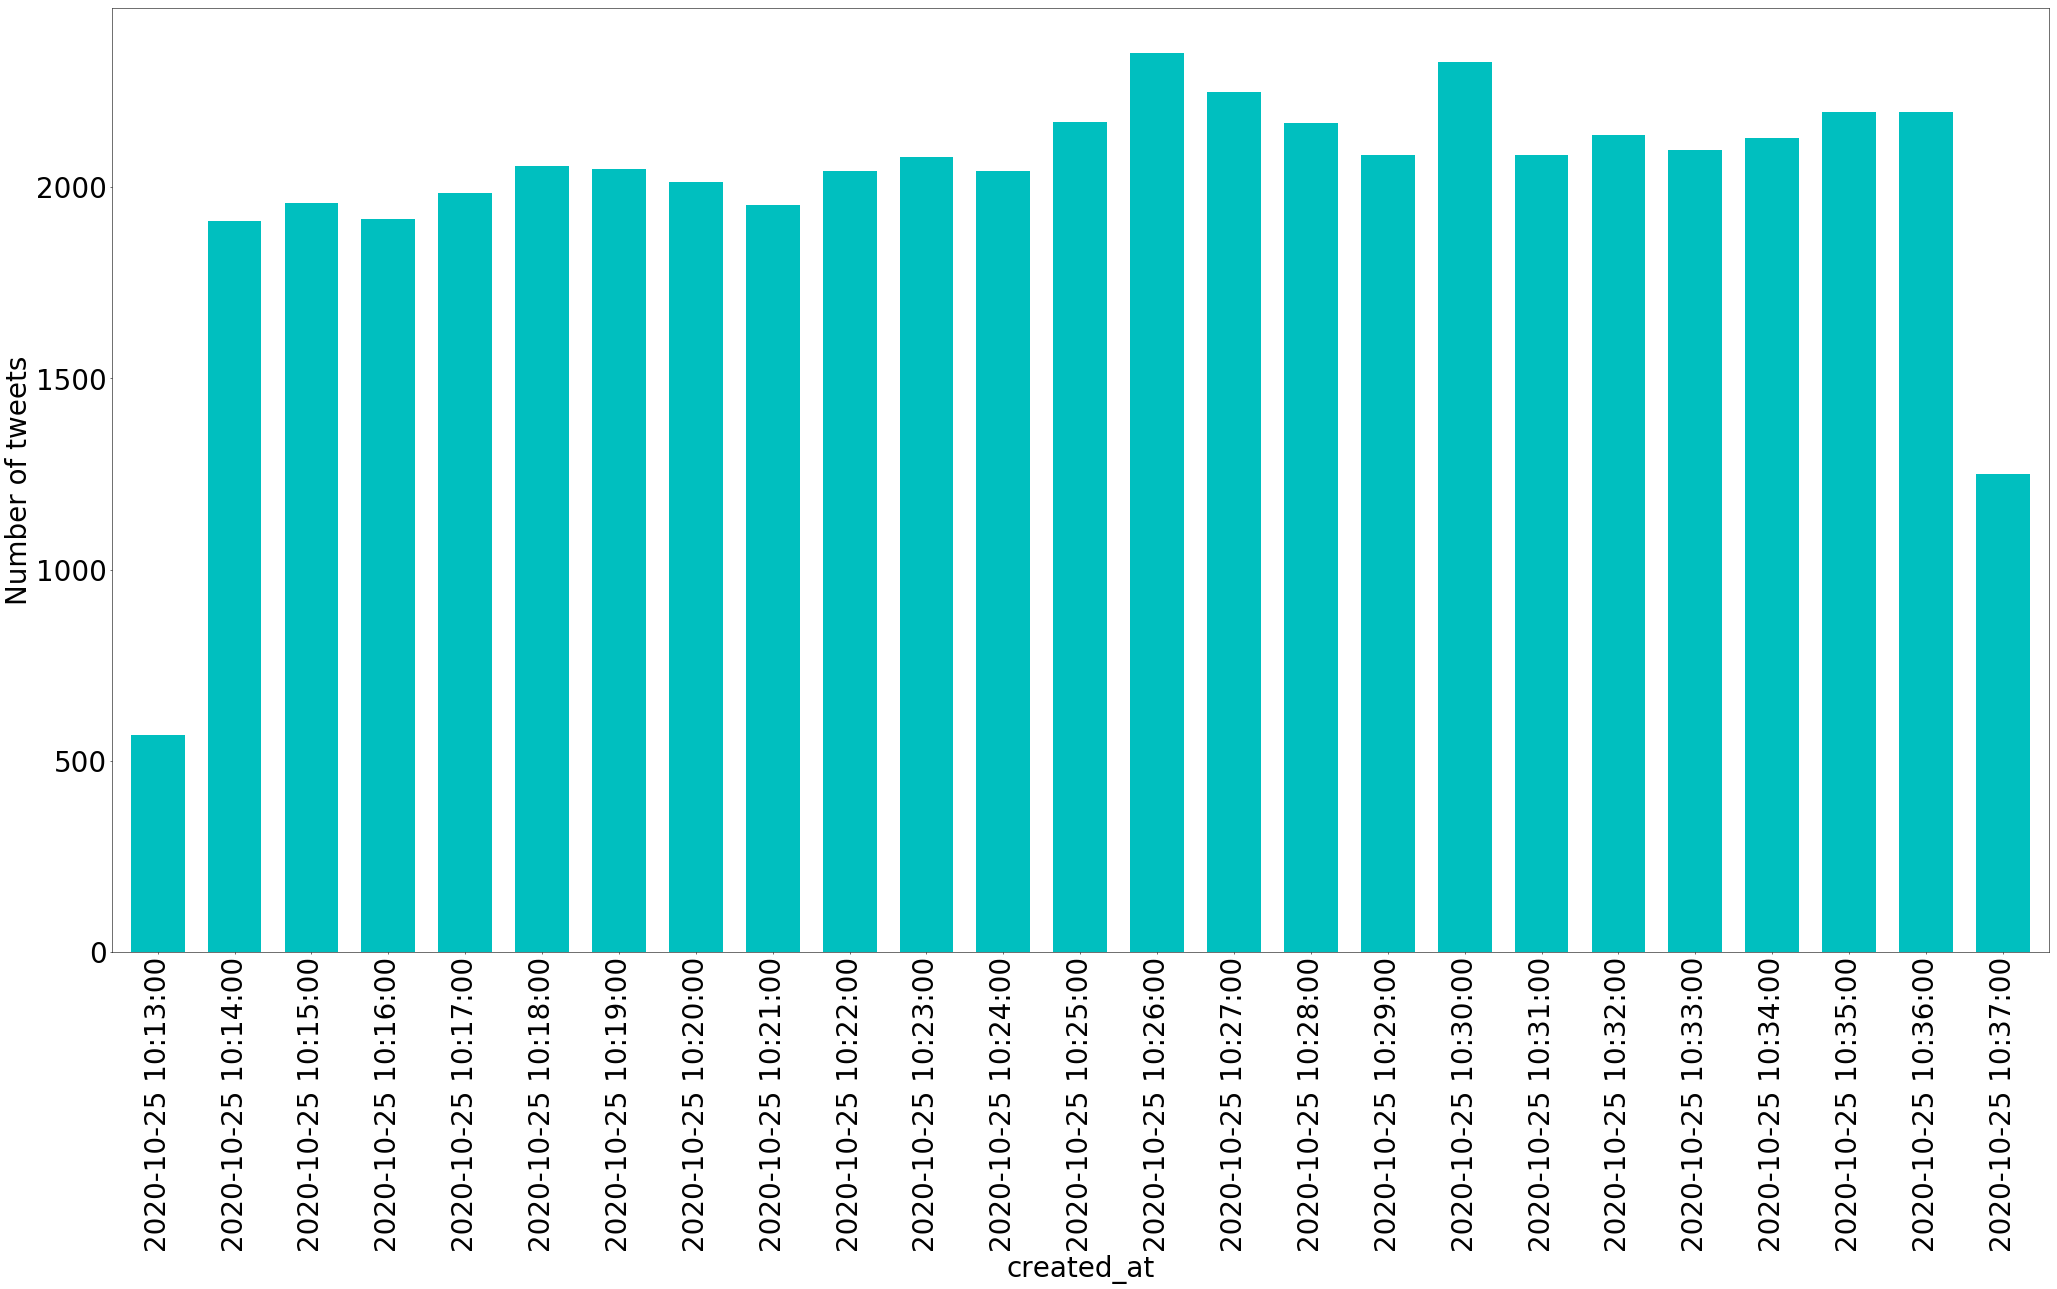

In [25]:
# Here we plot the number of tweets per minute

%matplotlib inline

plt.figure(figsize=(50, 25), dpi=50, facecolor='w', edgecolor='k')

plt.rc('grid', linestyle="-", color='black', alpha = 1)

plt.xlabel('Time', fontsize=40)
plt.ylabel('Number of tweets', fontsize=40)

covid_tweets_item_indexed_per_minute.plot(kind='bar', fontsize = 40, width=0.7, color = "c")

plt.show()

* I plot the number of tweets per minute for the 3 most frequently mentioned places.

In [26]:
# Create a dataframe with the frequency of the mentioned places and sort it descending

covid_tweets_top_three = covid_tweets_item_indexed.groupby(['location']).size().to_frame('count').astype(int).reset_index()

In [27]:
# Sort the dataframe in descending order

covid_tweets_top_three_sorted = covid_tweets_top_three.sort_values(by=['count'], ascending=False)
covid_tweets_top_three_sorted.head(3)

,location,count
6200,Malaysia,646
10246,United States,352
5510,"Lagos, Nigeria",318


In [28]:
# Save to a variable the top one most frequently used locations

location_top_one = covid_tweets_top_three_sorted.iloc[0, 0]
print(location_top_one, "it the #1 most frequently used locations")

Malaysia it the #1 most frequently used locations


In [29]:
# Save to a variable the top two most frequently used locations

location_top_two = covid_tweets_top_three_sorted.iloc[1, 0]
print(location_top_two, "it the #2 most frequently used locations")

United States it the #2 most frequently used locations


In [30]:
# Save to a variable the top three most frequently used locations

location_top_three = covid_tweets_top_three_sorted.iloc[2, 0]
print(location_top_three, "it the #3 most frequently used locations")

Lagos, Nigeria it the #3 most frequently used locations


In [31]:
# Now I subset the dataframe to include only the top three cities

covid_tweets_top_three_subset_one = covid_tweets_item_indexed[covid_tweets_item_indexed["location"]==location_top_one]
covid_tweets_top_three_subset_two = covid_tweets_item_indexed[covid_tweets_item_indexed["location"]==location_top_two]
covid_tweets_top_three_subset_three = covid_tweets_item_indexed[covid_tweets_item_indexed["location"]==location_top_three]

In [32]:
# Resample the data for #1 location per minute, summing up the number of tweets per minute

tweet_top_one_minute = covid_tweets_top_three_subset_one['item'].resample('1T').sum()

In [33]:
# Resample the data for #2 location per minute, summing up the number of tweets per minute

tweet_top_two_minute = covid_tweets_top_three_subset_two['item'].resample('1T').sum()

In [34]:
# Resample the data for #3 location per minute, summing up the number of tweets per minute

tweet_top_three_minute = covid_tweets_top_three_subset_three['item'].resample('1T').sum()

In [35]:
# Create one dataframe with the number of tweets per location per minute

tweet_top_min = pd.concat([tweet_top_one_minute, tweet_top_two_minute, tweet_top_three_minute], axis = 1)
tweet_top_min.columns = [location_top_one,location_top_two,location_top_three]

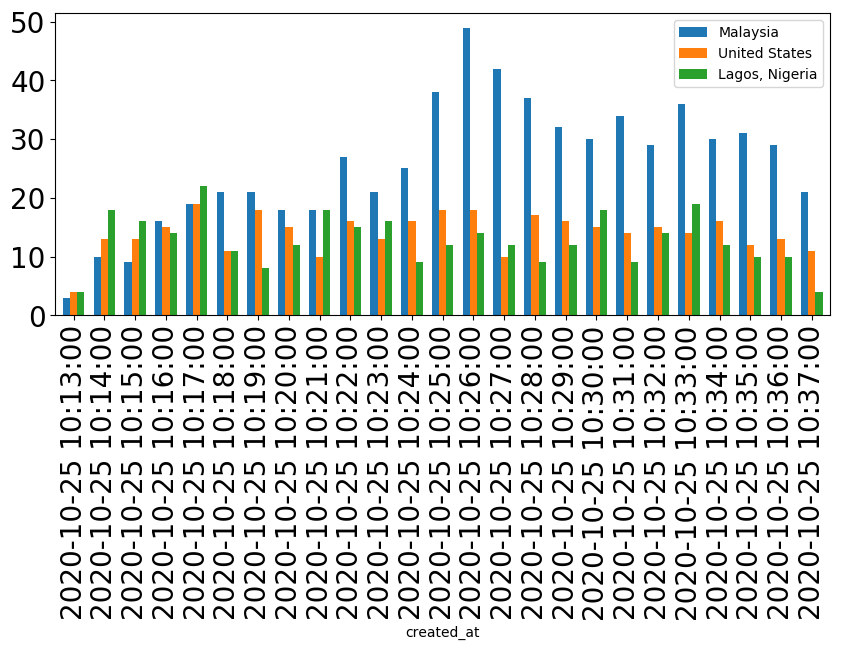

In [36]:
# Plot the number of tweets per location per minute as in one bar per location

%matplotlib inline

fig, ax = plt.subplots(figsize=(10, 4), dpi=100, facecolor='w', edgecolor='k')
tweet_top_min.plot(kind='bar', fontsize = 20, width=0.7, ax=ax)

plt.show()

## Filtering - Sentiment analysis
* I assume that simple emoticons can capture the sentiment of a tweet.

* I create:
    * one regular expression to detect positive emoticons: `:)`,`:D`, `XD` and 
    * one to detect negative emoticons: `:(`, `:'(`, `:((` in the tweets. 

I report the number of tweets with positive and the number of tweets with negative sentiment.

In [37]:
# This is the regular expression to detect the positive emoticons: 
# :),:D, XD

positive = r':[)]|:D|XD'
regex_positive = re.compile(positive)

In [38]:
# This is the regular expression to detect the negative emoticons: 
# :(, :'(, :(( 

negative = r':[(]|:\'[(]|:[(][(]'
regex_negative = re.compile(negative)

In [39]:
# Then we implement the function that calculates the count of tweets with positive sentiment 

positive_sen = 0
for _, text in covid_tweets.text.iteritems():
    if len(regex_positive.findall(text)) > 0:
        positive_sen += 1
    
print(positive_sen, "tweet(s) have positive sentiment out of", len(covid_tweets))

65 tweet(s) have positive sentiment out of 50000


In [40]:
# Then we implement the function that calculates the count of tweets with negative sentiment 

negative_sen = 0
for _, text in covid_tweets.text.iteritems():
    if len(regex_negative.findall(text)) > 0:
        negative_sen += 1
    
print(negative_sen, "tweet(s) have negative sentiment out of", len(covid_tweets))

27 tweet(s) have negative sentiment out of 50000


* I plot the number of tweets with positive and the number of tweets with negative sentiment per minute.

In [41]:
# I produce a list that has 0 if no positive emoticon is found
# and 1 if there is a positive emoticon.
# The length of the list equals that of the initial dataframe.

positive_sen_list = []
for _, text in covid_tweets_item_indexed.text.iteritems():
    has_positive = 0
    if len(regex_positive.findall(text)) > 0:
        has_positive = 1
    positive_sen_list.append(has_positive)

In [42]:
# I add this list to the initial dataframe

covid_tweets_item_indexed["positive_sentiment"] = positive_sen_list

In [43]:
# I resample the dataframe summing up the number of positive tweets per minute

tweets_positive_minute = covid_tweets_item_indexed["positive_sentiment"].resample('1T').sum()

In [44]:
# I produce a list that has 0 if no negative emoticon is found
# and 1 if there is a negative emoticon.
# The length of the list equals that of the initial dataframe.

negative_sen_list = []
for _, text in covid_tweets_item_indexed.text.iteritems():
    has_negative = 0
    if len(regex_negative.findall(text)) > 0:
        has_negative = 1
    negative_sen_list.append(has_negative)

In [45]:
# I add this list to the initial dataframe

covid_tweets_item_indexed["negative_sentiment"] = positive_sen_list

In [46]:
# I resample the dataframe summing up the number of positive tweets per minute

tweets_negative_minute = covid_tweets_item_indexed["negative_sentiment"].resample('1T').sum()

In [47]:
# Create one dataframe with the number of tweets with negative 
# and positive per minute

tweet_sentiments = pd.concat([tweets_positive_minute, tweets_negative_minute], axis = 1)
tweet_sentiments.columns = ["positive","negative"]

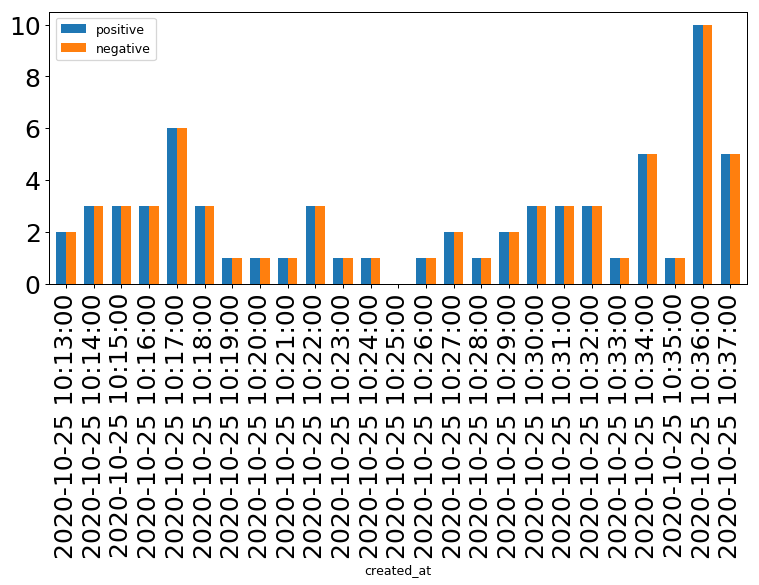

In [48]:
# Plot the number of tweets with negative and positive per minute

%matplotlib inline

fig, ax = plt.subplots(figsize=(10, 4), dpi=90, facecolor='w', edgecolor='k')
tweet_sentiments.plot(kind='bar', fontsize = 20, width=0.7, ax=ax)

plt.show()

## Text pre-processing
I use regular expressions to remove:
* Punctuation
* Digits
* New line characters
* URL links
* References to users: `@user`
* Hashtags

**I construct the regular expression.**
Step-by-step would be:

* Punctuation

<code>r'([^\w\s])'</code>

* Digits

<code>r'(\d)'</code>

* New line characters

<code>r'(\n)'</code>

* URL links

<code>r'(https://t[.]co/[a-zA-Z0-9]+\?)'</code>

* References to users: `@user`

<code>r'(@[0-9a-zA-Z_\-.]+)'</code>

* Hashtags

<code>r'(#)'</code>


**This gets defined in one regex as following:**

In [49]:
regex = '(https://t[.]co/[a-zA-Z0-9]+\?)|(#)|(@[0-9a-zA-Z_\-.]+)|(\n)|(\d)|([^\w\s])'

In [50]:
# Remove all elements mentioned above from the column text
# Store it to a new column called clean_text

covid_tweets_item_indexed["clean_text"] = covid_tweets_item_indexed.text.str.replace(regex, "")
covid_tweets_item_indexed.head(2)

,place,lang,text,screen_name,followers_count,statuses_count,location,item,positive_sentiment,negative_sentiment,clean_text
created_at,,,,,,,,,,,
2020-10-25 10:13:43,NaN,en,"RT @WIONews: The movie, which was supposed to ...",rjgms,298,44470,"Valencia, Mangalore",1,0,0,RT The movie which was supposed to be release...
2020-10-25 10:13:43,NaN,en,RT @PamelaFalk: U.S. sets single-day record wi...,UCLGlobCitProg,1851,4404,UCL,1,0,0,RT US sets singleday record with over new co...
